In [2]:
import numpy as np
from scipy.signal import convolve2d

import matplotlib.pyplot as plt

# Ising Model

The Ising model is a mathematical model of ferromagnetism in statistical mechanics. The model consists of discrete variables that represent magnetic dipole moments of atomic spins that can be in one of two states (+1 or -1). The spins are arranged in a lattice, and the model is used to study phase transitions and critical phenomena in statistical mechanics.

## Basic Ising Model

- **Components:** A lattice where each point represents an atomic 'spin' that can be in one of two states (+1 or -1).
- **Interactions:** Spins interact with thier nearest neighbors, which can be either ferromagnetics (aligning) or antiferromagnetic (opposing).
- **Energy:** The energy depends on the alignment of neighboring spins. Aligning spins have lower energy than opposing spins.
- **Temperature:** The temperature of the system affects the probability of a spin flipping. At high temperatures, spins are more likely to flip, while at low temperatures, spins are more likely to align.

## Phase Transition in the Ising Model

- **Low Temperature (Ordered Phase):** At low temperatures, the spins tend to align, and the system has a net magnetization.
- **High Temperature (Disordered Phase):** At high temperatures, the spins are more likely to flip, and the system has no net magnetization.
- **Critical Temperature:** The temperature at which the system transitions from the ordered phase to the disordered phase.
- **Critical Phenomena:** The behavior of the system near the critical temperature, such as the divergence of the correlation lengths.

In [ ]:
# Function to perform a periodic convolution on the lattice
def convolve_periodic(lattice): 
    kernel = np.array([[1,1,1]] * 3)  # Define the convolution kernel
    return convolve2d(lattice, kernel, mode='same', boundary='wrap')  # Perform the convolution


In [ ]:

# Function to calculate the energy of the lattice
def lattice_energy(lattice, J=1.0):
    return -J * np.sum(lattice * convolve_periodic(lattice))  # Calculate the energy using the Ising model equation


In [ ]:

# Function to perform a Metropolis update on the lattice
def metropolis(lattice, T=1.0, J=1.0):
    """
    Performs a Metropolis update on the given lattice.

    Parameters:
    lattice (ndarray): The input lattice.
    T (float): The temperature parameter (default is 1.0).
    J (float): The interaction strength parameter (default is 1.0).

    Returns:
    ndarray: The updated lattice after the Metropolis update.
    """
    new_lattice = lattice.copy()  # Create a copy of the lattice

    i, j = np.random.randint(0, new_lattice.shape[0], 2)  # Randomly select a position in the lattice
    new_lattice[i, j] *= -1  # Flip the spin at the selected position
    dE = lattice_energy(new_lattice, J) - lattice_energy(lattice, J)  # Calculate the change in energy

    if dE < 0 or np.random.rand() < np.exp(-dE / T):  # Accept the new lattice configuration based on the Metropolis criterion
        return new_lattice  # Return the updated lattice
    return lattice  # Return the original lattice if the update is not accepted


In [3]:

# Function to check if the lattice has reached equilibrium
def check_equillibrium(lattice):
    uniques, _ = np.unique(lattice, return_counts=True)  # Get the unique values in the lattice
    return len(uniques) == 2  # Check if there are exactly 2 unique values (representing the two spin states)


In [ ]:
def calc_hamming_distance(a1, a2):
    a1_flat = a1.flatten()  # Flatten a1
    a2_flat = a2.flatten()  # Flatten a2
    diff = a1_flat - a2_flat  # Subtract each element
    non_zero_indices = len(diff[diff != 0])  # Count all the non-zero indices
    return non_zero_indices


In [4]:
no_replicates = 3

n = 10 # nxn lattice

random_seeds = [1, 2, 3] # for my poor poor laptop

energy_reps = []
mag = []
for i in range(no_replicates):
    energies = []
    lattice = np.random.choice([-1, 1], size=(n, n))
    magnetization = []

    np.random.seed(random_seeds[i])

    while check_equillibrium(lattice):
        lattice = metropolis(lattice)
        energies.append(lattice_energy(lattice))
        spin = np.unique(lattice, return_counts=True)
        try:
            magnetization.append((spin[0][0] * spin[1][0] + spin[0][1] * spin[1][1]) / n**2)
        except:
            magnetization.append(magnetization[-1])
    print(f'finished iteration {i}')

    
    energy_reps.append(energies)
    mag.append(magnetization)

# should do this in the loop dumby
avg_energies = []
for i in energy_reps:
    avg_energies.append([np.mean(i[:j+1]) for j in range(len(i))])

# could add something that takes a running average of the energy
    # and then stops when the running average is constant for a certain number of iterations
    # or when the running average is constant to a certain number of decimal places
    # or if the delta is really small

finished iteration 0
finished iteration 1
finished iteration 2


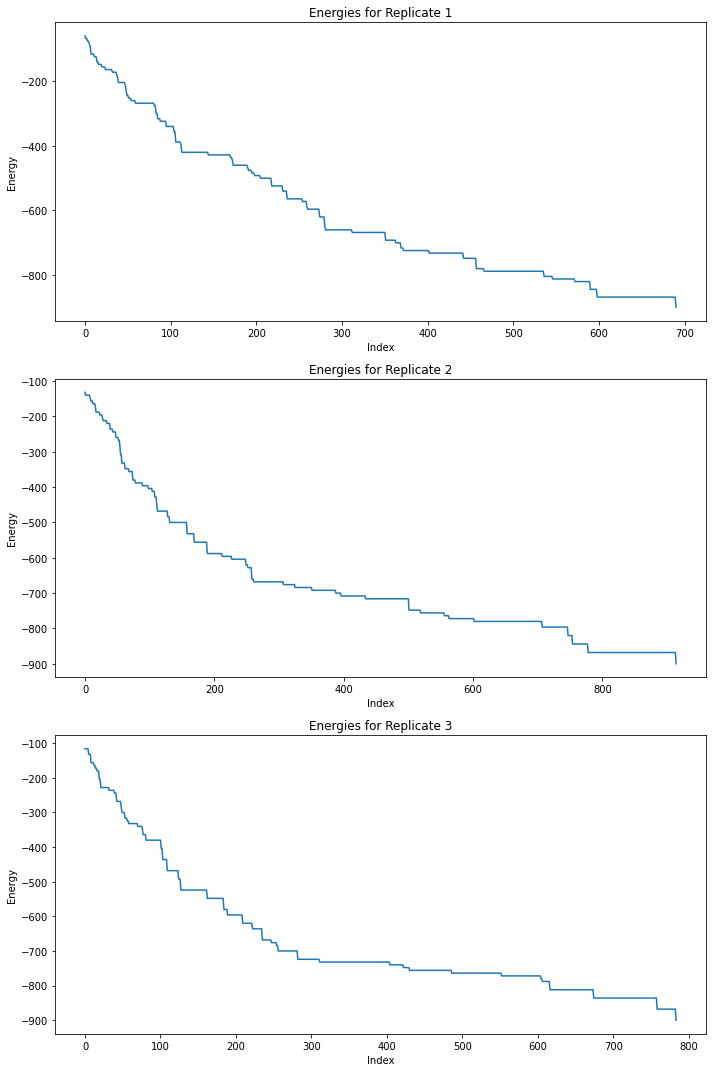

In [5]:
fig, axs = plt.subplots(len(energy_reps), 1, figsize=(10, 15))

for i, energies in enumerate(energy_reps):
    axs[i].plot(range(len(energies)), energies)
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Energy')
    axs[i].set_title(f'Energies for Replicate {i+1}')

plt.tight_layout()
plt.show()



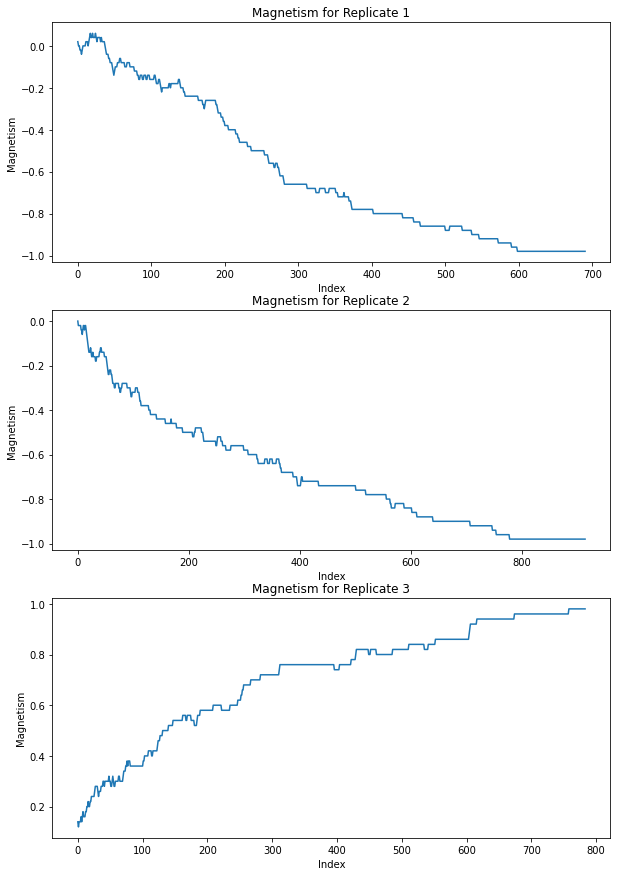

In [6]:
fig, axs = plt.subplots(len(mag), 1, figsize=(10, 15))


for i, m in enumerate(mag):
    axs[i].plot(range(len(m)), m)
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Magnetism')
    axs[i].set_title(f'Magnetism for Replicate {i+1}')

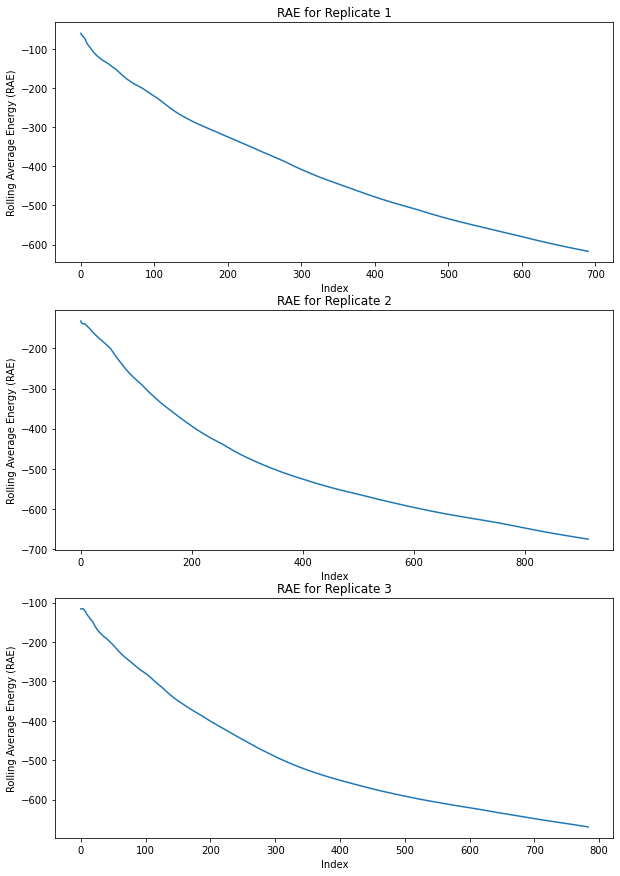

In [7]:
fig, axs = plt.subplots(len(mag), 1, figsize=(10, 15))


for i, m in enumerate(avg_energies):
    axs[i].plot(range(len(m)), m)
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Rolling Average Energy (RAE)')
    axs[i].set_title(f'RAE for Replicate {i+1}')



In [9]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Function to calculate the energy of the lattice
def lattice_energy(lattice, J=1.0):
    """
    Calculates the energy of the given lattice.

    Parameters:
    lattice (ndarray): The input lattice.
    J (float): The interaction strength parameter (default is 1.0).

    Returns:
    float: The energy of the lattice.
    """
    energy = 0
    for i in range(len(lattice)):
        for j in range(len(lattice)):
            energy += -J * lattice[i, j] * (lattice[(i+1)%len(lattice), j] + lattice[(i-1)%len(lattice), j] + lattice[i, (j+1)%len(lattice)] + lattice[i, (j-1)%len(lattice)])
    return energy / 2

# Function to perform a Metropolis update on the lattice
def metropolis(lattice, T=1.0, J=1.0):
    """
    Performs a Metropolis update on the given lattice.

    Parameters:
    lattice (ndarray): The input lattice.
    T (float): The temperature parameter (default is 1.0).
    J (float): The interaction strength parameter (default is 1.0).

    Returns:
    ndarray: The updated lattice after the Metropolis update.
    """
    new_lattice = lattice.copy()  # Create a copy of the lattice

    i, j = np.random.randint(0, new_lattice.shape[0], 2)  # Randomly select a position in the lattice
    new_lattice[i, j] *= -1  # Flip the spin at the selected position
    dE = lattice_energy(new_lattice, J) - lattice_energy(lattice, J)  # Calculate the change in energy

    if dE < 0 or np.random.rand() < np.exp(-dE / T):  # Accept the new lattice configuration based on the Metropolis criterion
        return new_lattice  # Return the updated lattice
    return lattice  # Return the original lattice if the update is not accepted

# Function to initialize the lattice
def initialize_lattice(N):
    """
    Initializes a lattice with random spins.

    Parameters:
    N (int): The size of the lattice.

    Returns:
    ndarray: The initialized lattice.
    """
    return np.random.choice([-1, 1], size=(N, N))

# Create a lattice
N = 50
lattice = initialize_lattice(N)

# Set up the figure and axis
fig, ax = plt.subplots()
im = ax.imshow(lattice, cmap='binary', interpolation='nearest')

# Function to update the lattice for each frame of the animation
def update(frame):
    global lattice
    lattice = metropolis(lattice, T=2.0)  # Adjust temperature as desired
    im.set_array(lattice)
    return im,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=200, interval=50, blit=True)

plt.show()


<IPython.core.display.Javascript object>